In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
#читаем данные
df = pd.read_csv('titanic/gender_submission.csv') 
test = pd.read_csv('titanic/test.csv') 
train = pd.read_csv('titanic/train.csv')

In [4]:
#соединим три файла
y = test.merge(df,on='PassengerId', how = 'right')

In [5]:
result = pd.concat([y, train])

In [6]:
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [7]:
# размер набора данных
result.shape

(1309, 12)

In [8]:
# проверим есть ли пропущенные значения
result.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [10]:
data_1 = result.dropna(axis=1, how='any')
(result.shape, data_1.shape)

((1309, 12), (1309, 8))

In [11]:
# Удаление строк, содержащих пустые значения
data_2 = result.dropna(axis=0, how='any')
(result.shape, data_2.shape)

((1309, 12), (270, 12))

In [9]:
result.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

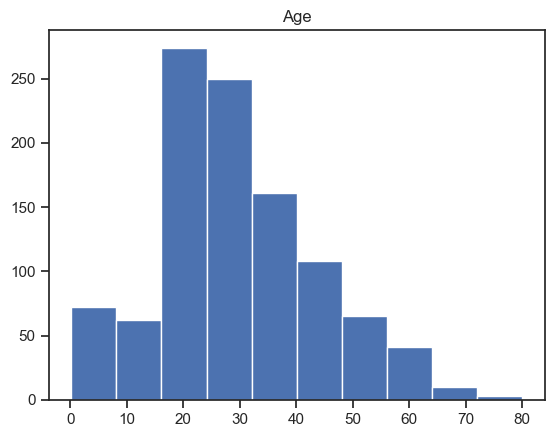

In [11]:
plt.hist(result['Age'])
plt.title('Age')
plt.show()

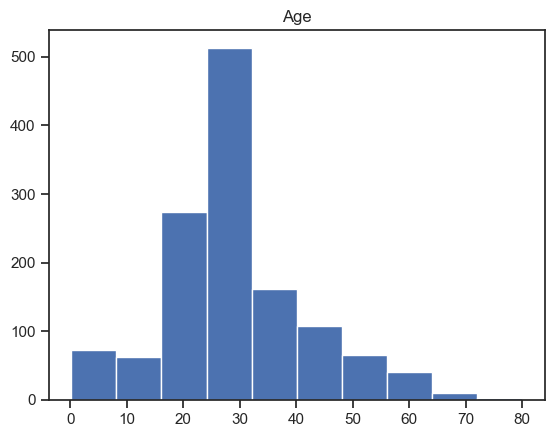

In [14]:
#заполнить пропуски можно средним значением
res_with_mean = pd.concat([y, train])
res_with_mean.Age = res_with_mean.Age.fillna(res_with_mean.Age.mean())
plt.hist(res_with_mean['Age'])
plt.title('Age')
plt.show()

In [15]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
result = pd.concat([y, train])
num_cols = []
total_count = result.shape[0]
for col in result.columns:
    # Количество пустых значений 
    temp_null_count = result[result[col].isnull()].shape[0]
    dt = str(result[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 263, 20.09%.
Колонка Fare. Тип данных float64. Количество пустых значений 1, 0.08%.


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator


In [19]:
data_num = result[num_cols] #столбцы заполненные 

In [20]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num[['Age']])
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [21]:
strategies=['mean', 'median', 'most_frequent']
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num[['Age']])
    return data_num_imp[mask_missing_values_only]
strategies[0], test_num_impute(strategies[0])

('mean',
 array([29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113767, 29.88113767, 29.88113767,
        29.88113767, 29.88113767, 29.88113

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 

In [23]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28

In [24]:
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [25]:
res_with_mean.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

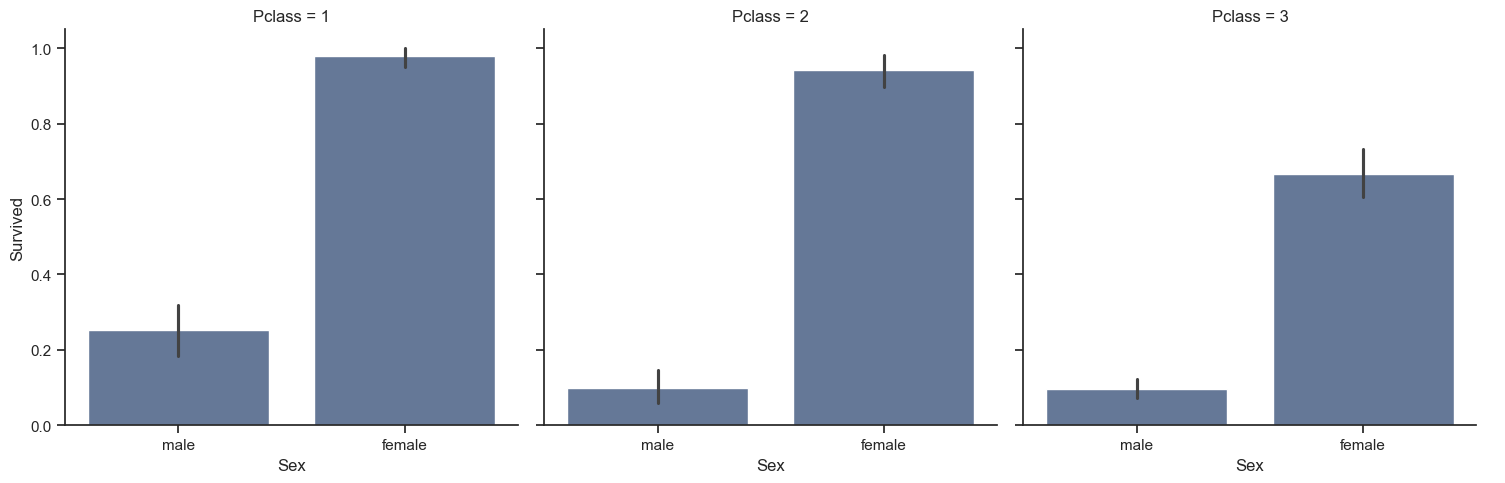

In [26]:
sns.catplot(data = res_with_mean,y='Survived',x='Sex',col='Pclass', kind='bar', saturation=0.5)

In [27]:
res_with_mean.groupby('Pclass')['PassengerId'].count()

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

Кодирование категорий челочисленными значениями

In [31]:
res_with_mean['gender_code'] = res_with_mean['Sex'].map({'male': 0, 'female': 1})
res_with_mean.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,gender_code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1


Масштабирование данных

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [33]:
min_age = res_with_mean['Age'].min()
max_age = res_with_mean['Age'].max()
(min_age, max_age)

(0.17, 80.0)

In [36]:
scaler = MinMaxScaler()
scaler_date = scaler.fit_transform(res_with_mean[['Age']])

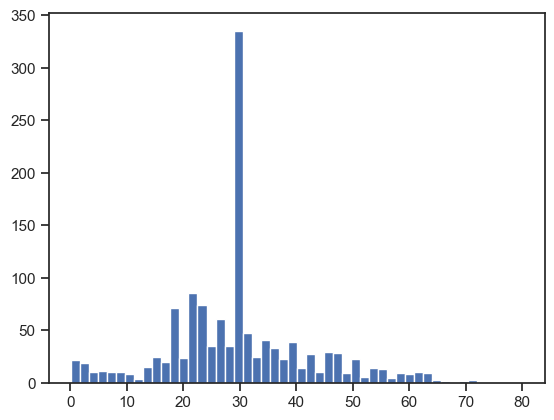

In [37]:
plt.hist(res_with_mean['Age'], 50)
plt.show()

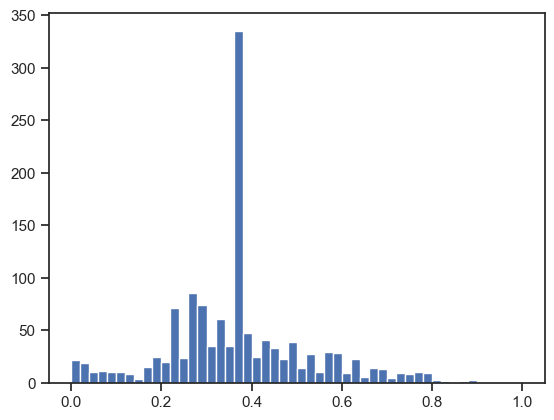

In [38]:
plt.hist(scaler_date, 50)
plt.show()